In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, Dropdown, IntSlider
from IPython import display
from ipywidgets import interact, interact_manual
from IPython.core.display import display

from calc_invest import *

%matplotlib inline

In [40]:
expenses_dict = {'name': ['car', 'rent', 'food', 'gas', 'pets', 'misc'], 'monthly_total': [310, 1200, 350, 150, 80, 200]}
expenses = pd.DataFrame(expenses_dict)
expenses

,name,monthly_total
0,car,310
1,rent,1200
2,food,350
3,gas,150
4,pets,80
5,misc,200


In [41]:
data, args_dict, expense_table = calc_invest(50000, 0, 0.05, 30000, 'mfj', 0.8, 571, expenses)

This is intended to maximize your investment portfolio along with quality of life, and focuses more on your future than your present. Sacrifice in the short term will yield comfort in the long term. 

All done! Run the following command in a jupyter notebook to see the effects on total income every year: 
 data.groupby('year')[['total_for_you_income', 'discretionary_income']].sum()

You may need to increase max viewable rows. While n = your desired number of rows, use this command: 
 pd.set_option('display.max_rows', n)



In [4]:
data

,investment,discretionary_income,expenses,total_for_you_income,year
0,0,210,2290,2500,1
1,1167,211,2290,2501,1
2,2337,212,2290,2502,1
3,3512,213,2290,2503,1
4,4690,214,2290,2504,1
...,...,...,...,...,...
566,1951836,1837,2290,4127,48
567,1959509,1843,2290,4133,48
568,1967207,1849,2290,4139,48
569,1974931,1856,2290,4146,48


In [42]:
by_year_calc = data.groupby('year')[['total_for_you_income', 'discretionary_income']].sum

In [43]:
by_year_calc()

,total_for_you_income,discretionary_income
year,,
1,30066,2586
2,30210,2730
3,30361,2881
4,30518,3038
5,30683,3203
6,30853,3373
7,31030,3550
8,31214,3734
9,31407,3927


In [57]:
plot_data1 = by_year_calc()
plot_data1['total_invested'] = data.groupby('year')['investment'].last()
plot_data1.tail()

,total_for_you_income,discretionary_income,total_invested
year,,,
44,46351,18871,4537386
45,47161,19681,4760951
46,48001,20521,4993624
47,48877,21397,5235776
48,28931,12901,5381563


In [7]:
data.tail()

,investment,discretionary_income,expenses,total_for_you_income,year
566,1951836,1837,2290,4127,48
567,1959509,1843,2290,4133,48
568,1967207,1849,2290,4139,48
569,1974931,1856,2290,4146,48
570,1982681,1862,2290,4152,48


In [46]:
args_dict

{'annual_taxable_income': 50000,
 'current_investments': 0,
 'expected_pct_dividends': 0.05,
 'min_living_cost': 30000,
 'filing_status': 'mfj',
 'pct_reinvest': 0.8,
 'months_remaining': 571}

In [55]:
args_dict = update(['annual_taxable_income', 'min_living_cost', 'pct_reinvest'], [100000, 40000, 0.8], args_dict)
args_dict

{'annual_taxable_income': 100000,
 'current_investments': 0,
 'expected_pct_dividends': 0.05,
 'min_living_cost': 40000,
 'filing_status': 'mfj',
 'pct_reinvest': 0.8,
 'months_remaining': 571}

In [48]:
[value for value in args_dict.values()]

[100000, 0, 0.05, 35000, 'mfj', 0.9, 571]

In [49]:
expense_table

,name,monthly_total
0,car,310
1,rent,1200
2,food,350
3,gas,150
4,pets,80
5,misc,200


In [56]:
data, args_dict, expense_table = calc_invest(**args_dict, expense_table=expense_table)

This is intended to maximize your investment portfolio along with quality of life, and focuses more on your future than your present. Sacrifice in the short term will yield comfort in the long term. 

All done! Run the following command in a jupyter notebook to see the effects on total income every year: 
 data.groupby('year')[['total_for_you_income', 'discretionary_income']].sum()

You may need to increase max viewable rows. While n = your desired number of rows, use this command: 
 pd.set_option('display.max_rows', n)



In [51]:
data.tail()

,investment,discretionary_income,expenses,total_for_you_income,year
566,6993617,3541,2290,5831,48
567,7023427,3553,2290,5843,48
568,7053348,3566,2290,5856,48
569,7083381,3578,2290,5868,48
570,7113527,3591,2290,5881,48


In [52]:
by_year_calc().tail()

,total_for_you_income,discretionary_income
year,,
44,46351,18871
45,47161,19681
46,48001,20521
47,48877,21397
48,28931,12901


In [53]:
plot_data2 = by_year_calc()
plot_data2['total_invested'] = data.groupby('year')['investment'].last()
plot_data2.head()

,total_for_you_income,discretionary_income,total_invested
year,,,
1,30066,2586,40164
2,30210,2730,85907
3,30361,2881,133752
4,30518,3038,183795
5,30683,3203,236136


In [58]:
plot_data1['plot'] = ['plot1' for _ in range(len(plot_data1))]
plot_data2['plot'] = ['plot2' for _ in range(len(plot_data2))]
joined_plot = pd.concat((plot_data1.reset_index(), plot_data2.reset_index()), axis=0).reset_index(drop=True)

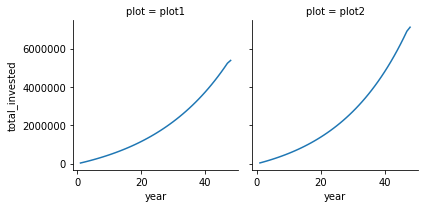

In [59]:
g = sns.FacetGrid(joined_plot, col="plot", sharey=True)
g = (g.map(sns.lineplot, "year", "total_invested"))

In [60]:
plot_data2.tail()

,total_for_you_income,discretionary_income,total_invested,plot
year,,,,
44,46351,18871,5913945,plot2
45,47161,19681,6229529,plot2
46,48001,20521,6559610,plot2
47,48877,21397,6904855,plot2
48,28931,12901,7113527,plot2


In [61]:
plot_data1.tail()

,total_for_you_income,discretionary_income,total_invested,plot
year,,,,
44,46351,18871,4537386,plot1
45,47161,19681,4760951,plot1
46,48001,20521,4993624,plot1
47,48877,21397,5235776,plot1
48,28931,12901,5381563,plot1


In [ ]:
def create_graph(args_dict, data, type='line'):
    """
    Creates graph using current data (default line graph) and creates a file in graph/ dir with unique title
    
    Args:
    
    """
    

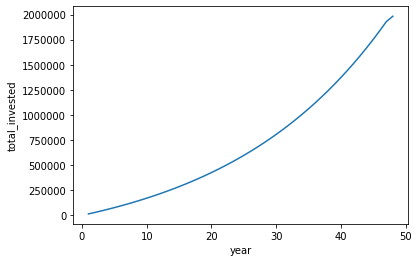

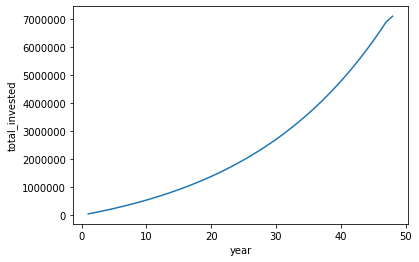

In [18]:
plt.figure()
plot1 = sns.lineplot(x=plot_data1.index, y='total_invested', data=plot_data1)
plt.savefig('../graphs/ex1.pdf')
plt.figure()
plot2 = sns.lineplot(x=plot_data2.index, y='total_invested', data=plot_data2)
plt.savefig('../graphs/ex2.pdf')

In [11]:
pd.options.display.max_rows
pd.set_option("display.max_rows", 600)


In [62]:
quarters = data[data.index % 3 == 0].reset_index(drop=True)
years = data[data.index % 12 == 0].reset_index(drop=True)
fiveyears = data[data.index % 60 == 0].reset_index(drop=True)

In [63]:
quarters

,investment,discretionary_income,expenses,total_for_you_income,year
0,0,1043,2290,3333,1
1,9532,1051,2290,3341,1
2,19159,1059,2290,3349,1
3,28883,1067,2290,3357,1
4,38704,1076,2290,3366,2
...,...,...,...,...,...
186,5133703,5321,2290,7611,47
187,5194743,5372,2290,7662,47
188,5256396,5424,2290,7714,48
189,5318667,5476,2290,7766,48


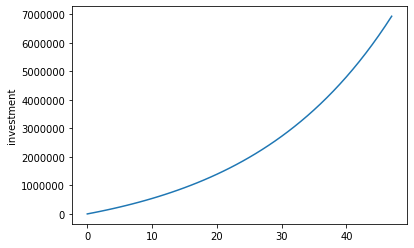

In [38]:
sns.lineplot(x=years.reset_index(drop=True).index, y=years.investment);

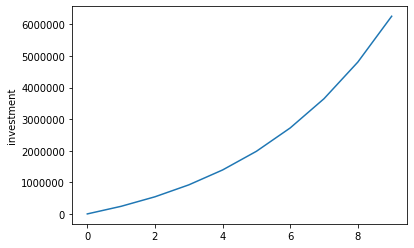

In [35]:
sns.lineplot(x=fiveyears.reset_index(drop=True).index, y=fiveyears.investment);